## 시계열 데이터 시각화 하기
### 항공사 직원이라 가정하고 시계열 데이터를 통한 수요 분석하기
### 가설을 세우고 검정하기 : 여름 휴가철에는 항공이용이 많을 것이다.
### 이 분석을 통해 우리가 얻을 수 있는 것 ?
* 추세를 파악할 수 있음
    * 수요가 늘어나고 있다면 늘어나는 수요에 대비
    * 수요가 줄어들고 있다면 서비스 개선을 하거나 새로운 사업계획을 세우기
* 계절에 따라 수요에 대한 계획을 세울 수 있음
    * 재고량, 예산, 운영인력, 시스템을 구성하는 서버의 트래픽 양 등

https://seaborn.pydata.org/examples/heatmap_annotation.html

In [29]:
# 라이브러리 로드 하기
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [31]:
# 데이터셋 로드하기
df = sns.load_dataset("flights")
df.shape

(144, 3)

In [3]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## 같은 데이터로 다양한 시각화 해보기
* bar, line, point, box, violin, swarm plot

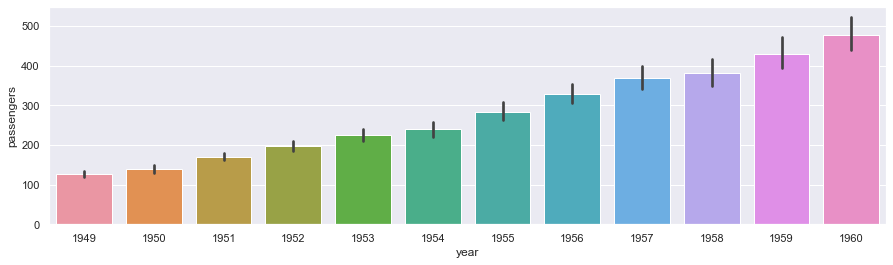

In [32]:
# barplot
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x="year", y="passengers")

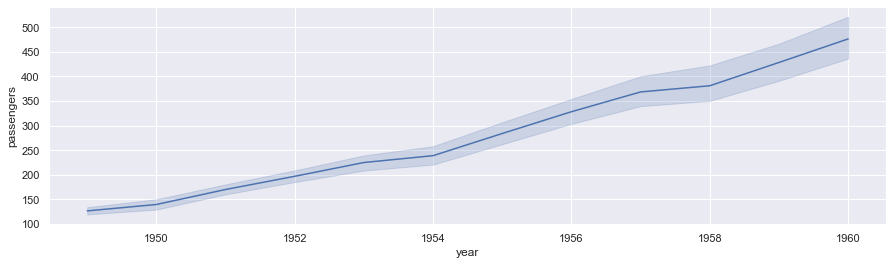

In [5]:
# lineplot
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="year", y="passengers")

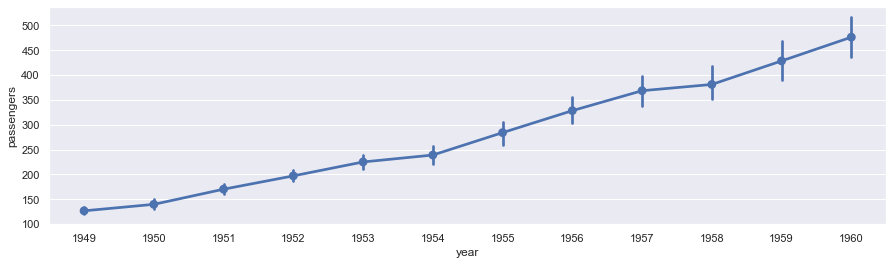

In [33]:
# pointplot
plt.figure(figsize=(15, 4))
sns.pointplot(data=df, x="year", y="passengers")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

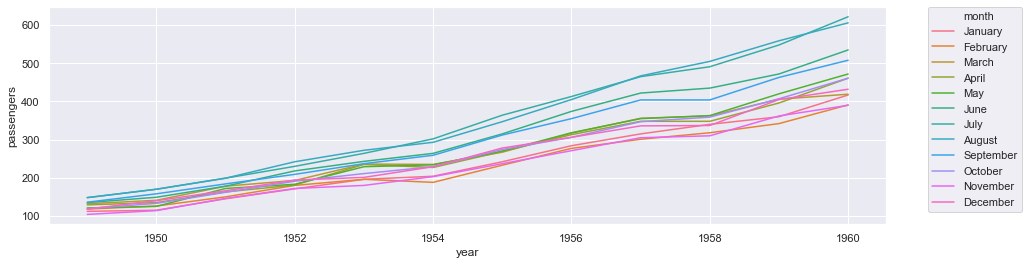

In [7]:
# lineplot 에 hue를 통해 month 값에 따라 여러 색으로 나눠 그리기 

plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="year", y="passengers", hue="month")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

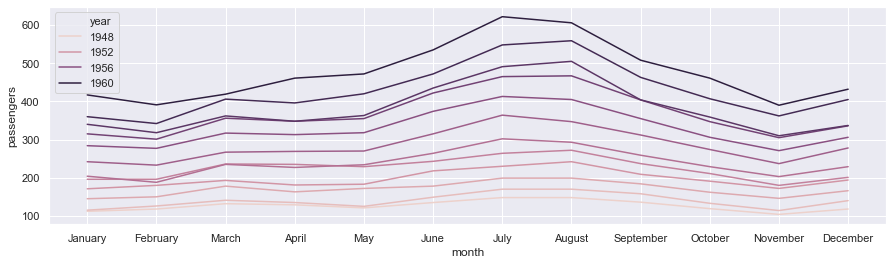

In [34]:
# lineplot 에 hue를 통해 year 값에 따라 여러 색으로 나눠 그리기 

plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x="month", y="passengers", hue="year")

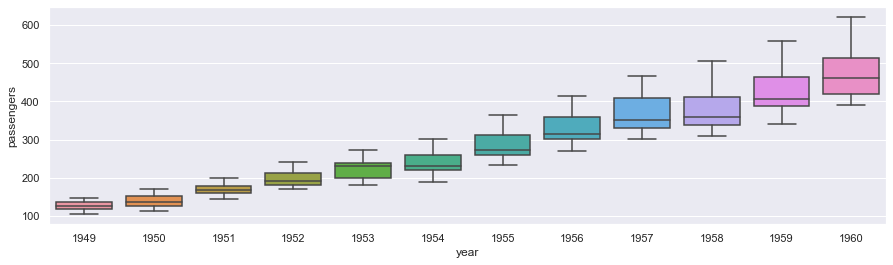

In [35]:
# boxplot 
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="year", y="passengers")

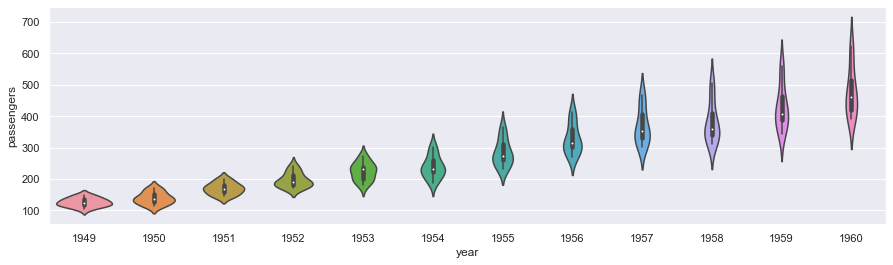

In [10]:
# violinplot
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="year", y="passengers")

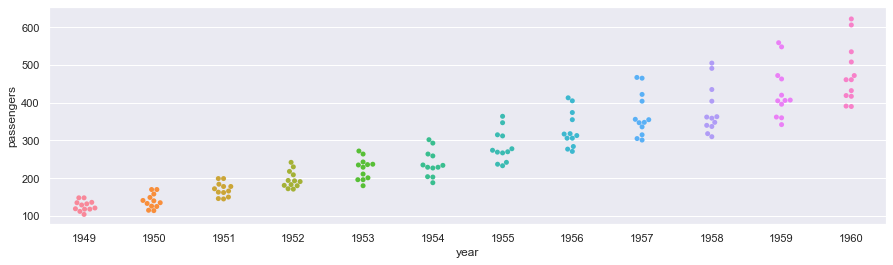

In [11]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df, x="year", y="passengers")

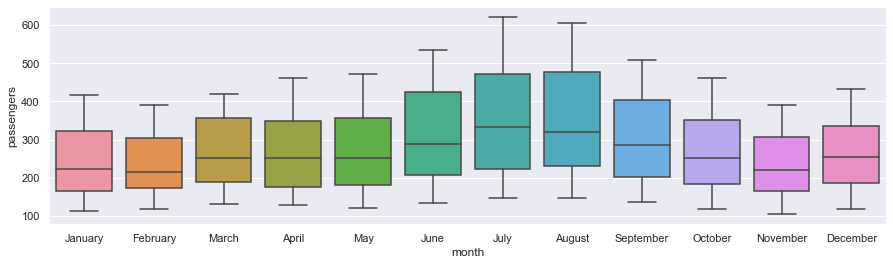

In [12]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="month", y="passengers")

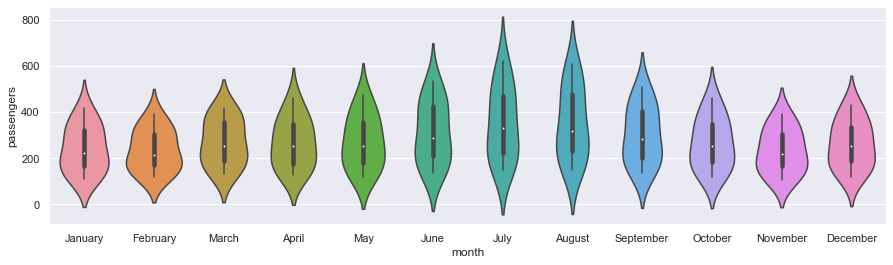

In [13]:
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="month", y="passengers")

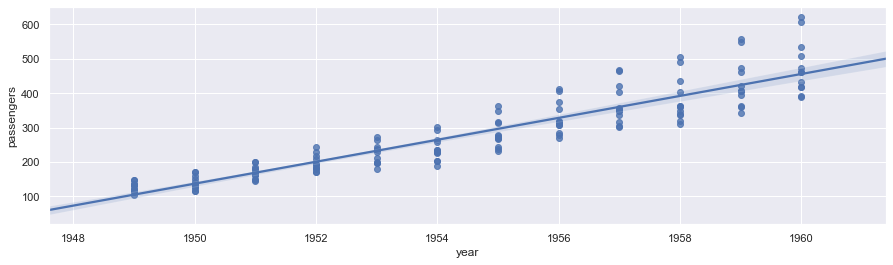

In [28]:
plt.figure(figsize=(15, 4))
sns.regplot(data=df, x="year", y="passengers")

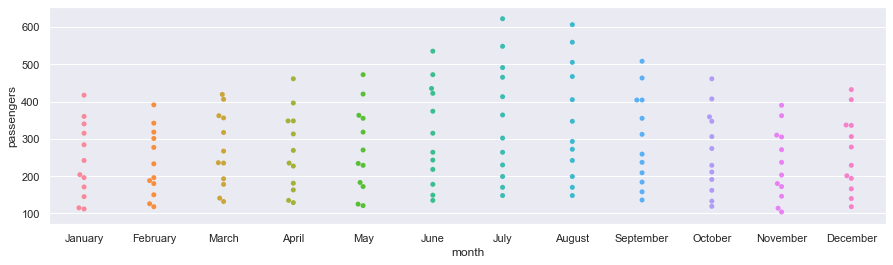

In [14]:
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df, x="month", y="passengers")

In [15]:
df_h = df.pivot("month", "year", "passengers")
df_h

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


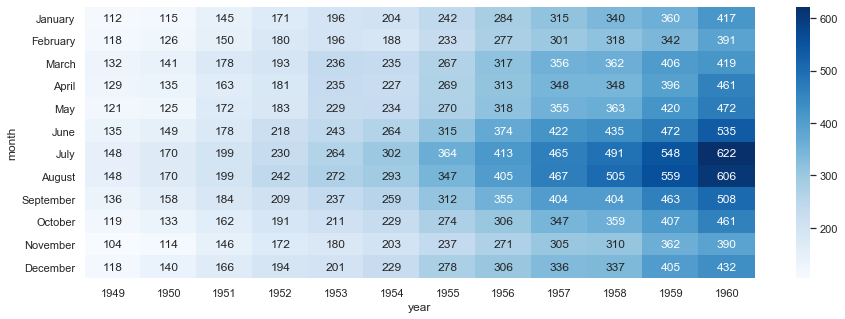

In [16]:
plt.figure(figsize=(15, 5))
sns.heatmap(df_h, cmap="Blues", annot=True, fmt=".0f")

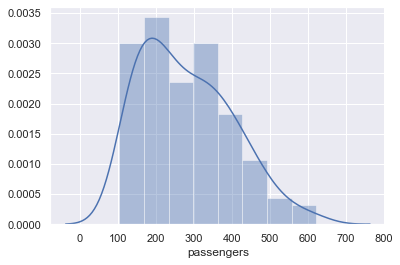

In [17]:
sns.distplot(df["passengers"])

## 서브플롯 그리기

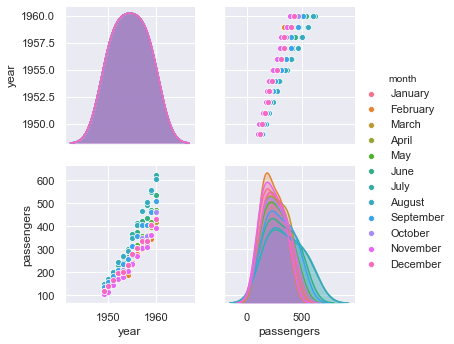

In [18]:
sns.pairplot(df, hue="month")

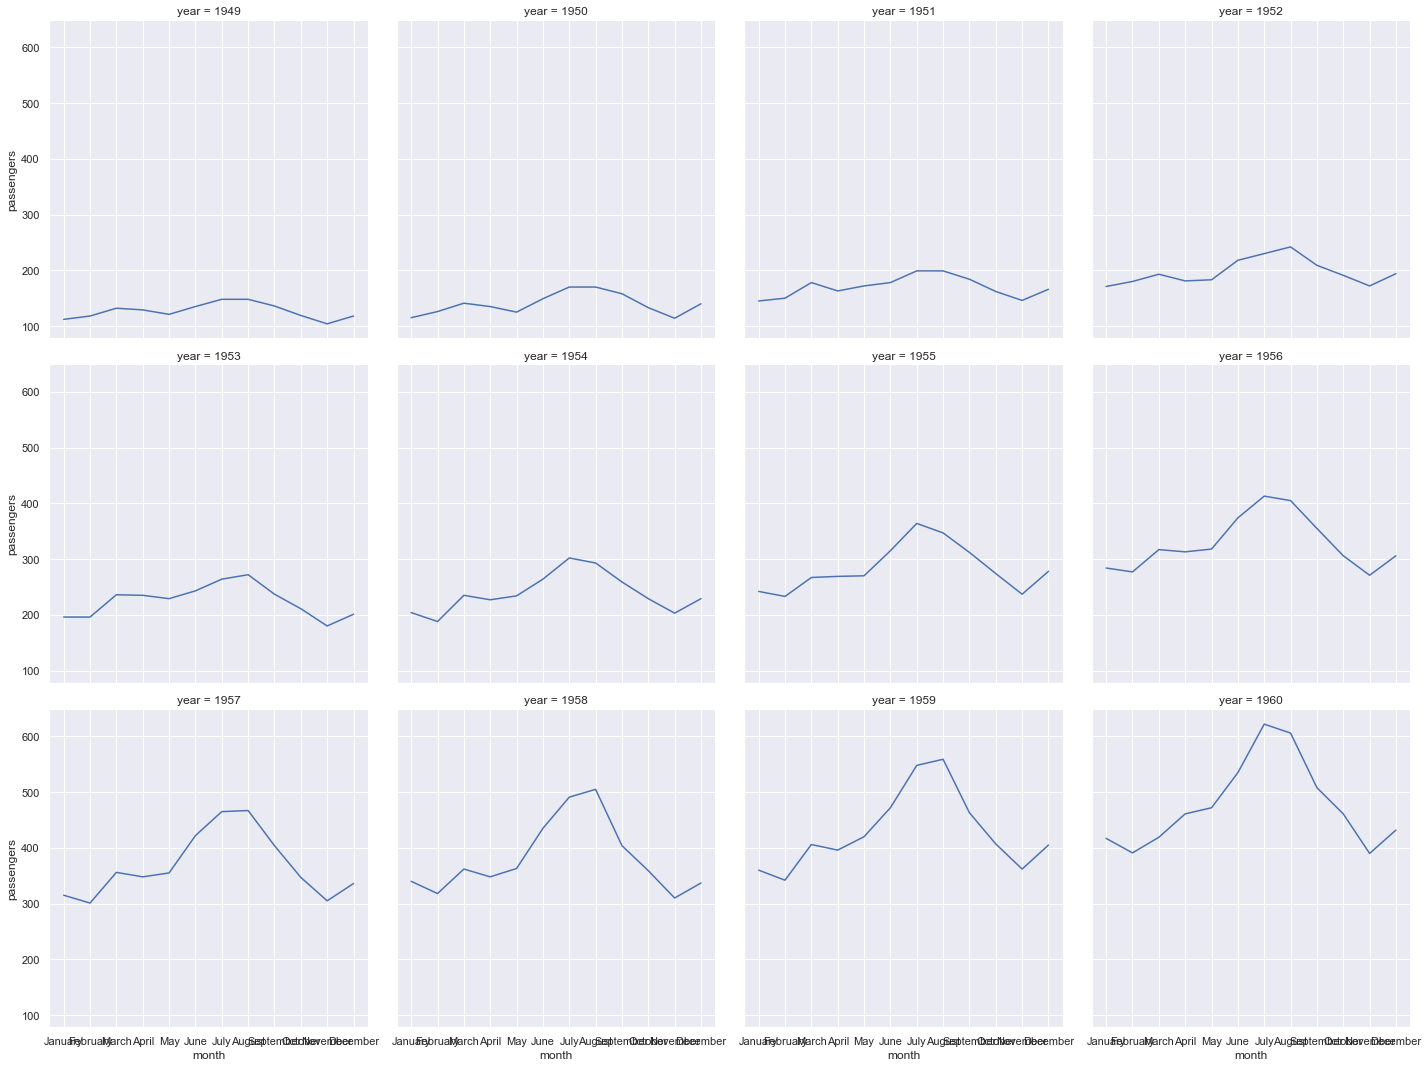

In [19]:
sns.relplot(data=df, x="month", y="passengers", col="year", col_wrap=4, kind="line")

## datetime 형태로 변환해서 보기

* datetime 변환하기
https://docs.python.org/ko/3/library/datetime.html#strftime-strptime-behavior

In [20]:
# 날짜 변환을 하기 전에 동작을 확인하고 변환 함수를 만듭니다.
from datetime import datetime

year = 2020
month = 'March'

s = f"{year} {month} 1"
d = datetime.strptime(s, '%Y %B %d')
print(d)
print(d.strftime('%Y-%m-%d'))
print(type(d.strftime('%Y-%m-%d')))

2020-03-01 00:00:00
2020-03-01
<class 'str'>


In [21]:
def find_datetime(row):
    year = row["year"]
    month = row["month"]

    s = f"{year} {month} 1"
    date = datetime.strptime(s, '%Y %B %d')
    return date

In [22]:
# 판다스의 apply 를 사용해서 위에서 만든 함수를 적용해 줍니다.
df["date"] = df.apply(find_datetime, axis=1)

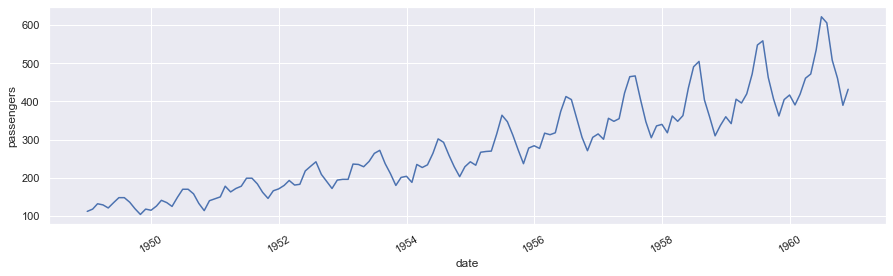

In [23]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df, x="date", y="passengers")

## Time Series data Decomposition(시계열 데이터 분해)

* Trend
* Seasonal
* Residual(random, remainder)

### statsmodels 로 Trend, Seasonal, Residual 한번에 보기
* 공식 문서 : [Installing statsmodels — statsmodels](http://www.statsmodels.org/stable/install.html)
* 별도의 설치가 필요
    * pip 사용시 : `pip install statsmodels`
    * 아나콘다 사용시 : `conda install -c conda-forge statsmodels`

In [24]:
# statsmodels 를 사용하기 위해서는 아래와 같이 포맷을 변경해 줄 필요가 있음
df_date = df[["date", "passengers"]].set_index("date")
df_date.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## 시계열 분해
### Additive Model

* 값을 더해서 구함

$y_t = Level + Trend + Seasonality + Noise$

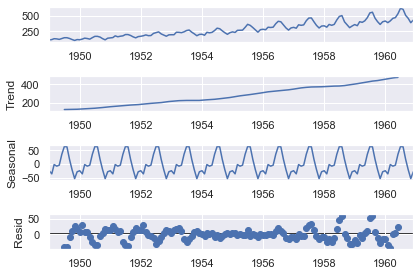

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_date)
d = decomp.plot()

### Multiplicative Model
*  값을 곱해서 구함

$y_t = Level \times Trend \times Seasonality \times Noise$

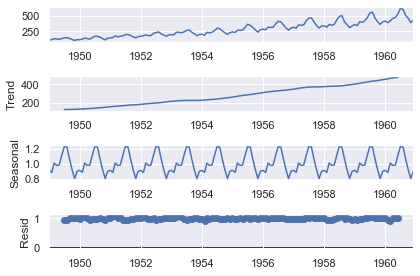

In [26]:
decomp = seasonal_decompose(df_date, model="multicapative")
d = decomp.plot()